# Flightlines

In [6]:
import cPickle as pickle
from fatiando import gridder
import numpy as np
import matplotlib.pyplot as plt

In [7]:
shape = (100, 16)
area = [-2000., 2000., -2000., 2000.]
h = -150.
x, y, z = gridder.regular(area, shape, z=h)

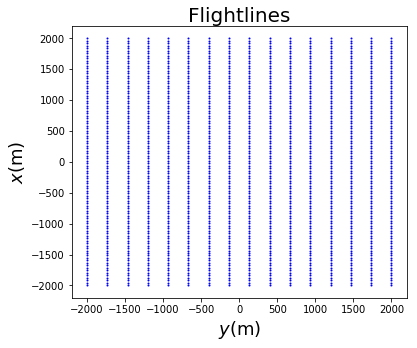

In [8]:
plt.figure(figsize=(6,5))
plt.title('Flightlines', fontsize=20)
plt.plot(y, x, 'bo', markersize=1)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)

plt.show()

In [9]:
flightlines_grid = dict()
flightlines_grid[shape] = shape
flightlines_grid['N'] = shape[0]*shape[1]
flightlines_grid['area'] = area
flightlines_grid['x'] = x
flightlines_grid['y'] = y
flightlines_grid['z'] = z

In [10]:
a = (abs(area[0]) + abs(area[1]))*(abs(area[2]) + abs(area[3]))/1000000.
file_name = 'flightlines_grid_%dpts_%dkm2_%dm.pickle' % (x.size, a, h)
with open(file_name, 'w') as f:
    pickle.dump(flightlines_grid, f)